![](https://img.kaikeba.com/70350130700202jusm.png)

In [3]:
import os, cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
# images 文件夹的地址
path = '/content/images' #"images"

# Airplanes_Annotations 文件夹的地址
annot = '/content/Airplanes_Annotations' # "Airplanes_Annotations"

In [6]:
annot_list = os.listdir(annot) # 乱序文件列表。不适合用于时序图像数据集，最好顺序读取文件
annot_list

['airplane_011.csv',
 'airplane_021.csv',
 'airplane_023.csv',
 'airplane_026.csv',
 'airplane_002.csv',
 'airplane_029.csv',
 'airplane_001.csv',
 'airplane_018.csv',
 'airplane_007.csv',
 'airplane_028.csv',
 'airplane_004.csv',
 'airplane_024.csv',
 'airplane_017.csv',
 'airplane_006.csv',
 'airplane_025.csv',
 'airplane_020.csv',
 'airplane_015.csv',
 'airplane_022.csv',
 'airplane_003.csv',
 'airplane_013.csv',
 'airplane_010.csv',
 'airplane_019.csv',
 'airplane_014.csv',
 'airplane_012.csv',
 'airplane_005.csv',
 'airplane_009.csv',
 'airplane_027.csv',
 'airplane_016.csv',
 'airplane_008.csv',
 'airplane_030.csv']

In [11]:
# type(annot_list[0].split('airplane_'))
# list

list

In [13]:
# annot_list[0].split('airplane_')[1] 
#001.csv

'001.csv'

In [15]:
# a_test = ['001.csv', '003.csv', '002.csv']
# a_test.sort()
# a_test
# ['001.csv', '002.csv', '003.csv']

['001.csv', '002.csv', '003.csv']

In [12]:
annot_list.sort(key = lambda x : x.split('airplane_')[1]) # 顺序文件列表
annot_list

['airplane_001.csv',
 'airplane_002.csv',
 'airplane_003.csv',
 'airplane_004.csv',
 'airplane_005.csv',
 'airplane_006.csv',
 'airplane_007.csv',
 'airplane_008.csv',
 'airplane_009.csv',
 'airplane_010.csv',
 'airplane_011.csv',
 'airplane_012.csv',
 'airplane_013.csv',
 'airplane_014.csv',
 'airplane_015.csv',
 'airplane_016.csv',
 'airplane_017.csv',
 'airplane_018.csv',
 'airplane_019.csv',
 'airplane_020.csv',
 'airplane_021.csv',
 'airplane_022.csv',
 'airplane_023.csv',
 'airplane_024.csv',
 'airplane_025.csv',
 'airplane_026.csv',
 'airplane_027.csv',
 'airplane_028.csv',
 'airplane_029.csv',
 'airplane_030.csv']

###  第一题：请利用csv文件中的坐标值(x1,y1,x2,y2)将飞机用方框标记出来  

图片名称为： airplane_001.jpg


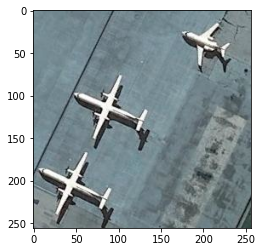

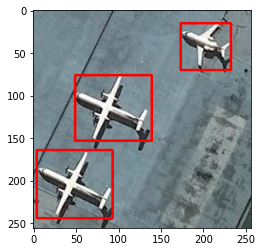

In [16]:
'''
airplane_001.jpg
airplane_002.jpg
airplane_003.jpg
.....
'''
for e, i in enumerate(annot_list): # e：序号；i：第i个文件的名字（顺序）
    if e == 0: # 指定第一张图片，显示
        filename = i.split(".")[0]+".jpg" 
        print('图片名称为：' , filename)
        img = cv2.imread(os.path.join(path,filename))
        df = pd.read_csv(os.path.join(annot,i))
        plt.imshow(img)
        for row in df.iterrows(): # iterrow:类似于字典的键-值对，遍历csv文件行的索引-序列对
            x1 = int(row[1][0].split(" ")[0]) # 取四个数值中的第一个数值：173
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            ########  第一题：请利用csv文件中的坐标值(x1,y1,x2,y2)将飞机用方框标记出来  #######
            # 请在此行填写答案：
            cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)
        plt.figure()
        plt.imshow(img)
        break

# 知识点1 : iterrow
```
iterrow:类似于字典的键-值对，遍历csv文件行的索引-序列对,本csv文件：
         索引(row[0])                   序列(row[1])                 坐标(row[1][0])
           0        3   173 15 232 70 Name: 0 , dtype : object     173 15 232 70
           1        3   49 76 139 153 Name: 1 , dtype : object     49 76 139 153
           2        3    4 164 93 244 Name: 2 , dtype : object     4 164 93 244
注意：遍历行，不保留数据类型，故row[1][0]只有坐标
```

# 知识点2 : rectangle
```
import cv2
cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2) # 框的颜色(color)为红，框的厚度(thickness)为2

x1,y1 ------
|          |
|          |
|          |
--------x2,y2
```
 - os.path.join(a,b) 
  - 经常使用，用于把两个路径连接在一块

In [17]:
cv2.setUseOptimized(True); # OpenCV 中的默认优化 ,代码运行速度可以提升
# 创建 Selective Search Segmentation 对象：体检测之选择性搜索（SS）
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation() 

###  第二题：请将ss操作后得到的坐标值(x,y,w,h)在图片上以方框的形式绘制出来并显示

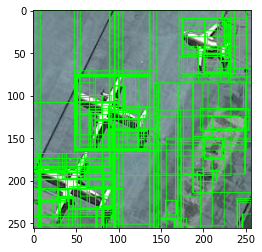

In [33]:
fname = annot_list[0].split('.')[0] + '.jpg' # 指定图片名称，第一张图片
im = cv2.imread(os.path.join(path, fname))
ss.setBaseImage(im) # 设置要进行ss操作的图片
ss.switchToSelectiveSearchFast() # 实用“快速模式”进行ss操作。还有“精准模式”(慢)：switchToSelectiveSearchQuality()
rects = ss.process() # 执行ss操作(先超像素分割，然后将每个分割出来的块画框，这里得到的是各种坐标)
imOut = im.copy() # 浅拷贝：im变了，imOut也变。

for i, rect in (enumerate(rects)):
    x, y, w, h = rect
    ########  第二题：请将ss操作后得到的坐标值(x,y,w,h)在图片上以方框的形式绘制出来并显示  #######
    # 请在此行填写答案：
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0,255,0), 1)
# 请在此行填写答案： plt 展示画布
plt.figure()
plt.imshow(imOut)

In [34]:
train_images=[]
train_labels=[]

## IoU 的全称为交并比（Intersection over Union）
![](https://img-blog.csdn.net/20180922220708895?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTQwNjE2MzA=/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70)

[扩展阅读：目标检测之IOU，点我😂](https://blog.csdn.net/u014061630/article/details/82818112)

![](https://img-blog.csdn.net/20180924130149184?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTQwNjE2MzA=/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70)


# 知识点3 : assert函数
```
  assert a < b ：如果a < b , 继续向下执行；否则抛出错误。等价于如下代码：
if a < b : 
    continue
else:
    AssertionError
```

# 知识点4 : IOU计算公式
```
1、相交方式假设
  假设两框相交方式如下：
  ——————————————————————————————————————————————————> x轴
 ｜-------------------
 ｜|                 |
 ｜|      bbox1      |
 ｜|                 |
 ｜| bbox2:(x1,y1) -----------
 ｜|       |         |       |
 ｜|       |         |       |
 ｜|       |         |       |
 ｜|       |         |       |
 ｜|       |         |       |
 ｜|       |         |       |
 ｜|       |         |       |
 ｜|       |         |       |
 ｜|       |         |       |
 ｜|       |         |       |
 ｜----------bbox1:(x2,y2)   |
 ｜        |                 |    
 ｜        |                 |
 ｜        |                 |
 ｜        |    bbox2        |
 ｜        |                 |
 ｜        -------------------
 ｜
\｜/
 \/
 y轴

2、目标检测评估指标IOU计算公式

                  两框交集部分长方形的面积
IOU =    ——————————————————————————————————————————
            框1面积+框2面积-两框交集部分长方形的面积
```

###  第三题：请根据上述的坐标值(```x_left,y_top,x_right,y_bottom```)计算两框交集部分(长方形)的面积 
###  第四题：请根据上述的坐标值(```x_left,y_top,x_right,y_bottom```)计算IOU 

In [38]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']  # assert : 如果bb1['x1'] < bb1['x2']，继续向下执行 
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1']) # 左上角x坐标(若图所示，则为bbox2的x1)：如果框2左上角x坐标大于框1左上角x坐标，则选择框2的左上角x坐标
    y_top = max(bb1['y1'], bb2['y1']) # 左上角y坐标(bbox2的y1)，同上
    x_right = min(bb1['x2'], bb2['x2']) # 右下角x坐标(bbox1的x2)
    y_bottom = min(bb1['y2'], bb2['y2']) # 右下角y坐标(bbox1的y2)

    if x_right < x_left or y_bottom < y_top: # 两框没有交集
        return 0.0
    ########  第三题：请根据上述的坐标值(x_left,y_top,x_right,y_bottom)计算两框交集部分(长方形)的面积  #######
    # 请在此行填写答案：
    connection_area = (x_right - x_left) * (y_bottom - y_top) # 交集面积
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1']) # 框1的面积
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])  # 框2的面积
    ########  第四题：请根据上述的坐标值(x_left,y_top,x_right,y_bottom)计算IOU  #######
    # 请在此行填写答案：
    iou = connection_area / (bb1_area + bb2_area - connection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [36]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation() # 进行超像素分割

Python startswith() 方法用于检查字符串是否是以指定子字符串开头，如果是则返回 True，否则返回 False。如果参数 beg 和 end 指定值，则在指定范围内检查。[点我](https://www.runoob.com/python/att-string-startswith.html)

### 设置这些的含义？？
counter = 0 # 有飞机的框的个数    
falsecounter = 0 # 无飞机的框的个数    
flag = 0  # 有飞机和无飞机的框的个数都大于30   
fflag = 0 # 若置1，则有飞机的个数大于30   
bflag = 0 # 若置1，则无飞机的个数大于30   

In [40]:
for e, i in enumerate(annot_list): # 顺序读取文件
    try:
        if i.startswith("airplane"):
            filename = i.split(".")[0]+".jpg"
            # print(e,filename)
            image = cv2.imread(os.path.join(path, filename))
            df = pd.read_csv(os.path.join(annot, i))
            gtvalues=[] # csv中标注的框坐标(左上角坐标和右下角坐标)
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1, "x2":x2, "y1":y1, "y2":y2})
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process() # 执行ss操作(各种坐标)
            imout = image.copy()
            
            counter = 0 # 有飞机的框的个数
            falsecounter = 0 # 无飞机的框的个数
            flag = 0  # 有飞机和无飞机的框的个数都大于30
            fflag = 0 # 若置1，则有飞机的个数大于30
            bflag = 0 # 若置1，则无飞机的个数大于30
            for e, result in enumerate(ssresults):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result # 获取ss处理后得到的框的左上角坐标、宽、高
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h}) # 计算ss处理后每一个框与真实框的交并比(IOU)
                        if counter < 30:
                            if iou > 0.70: 
                                timage = imout[y:y+h,x:x+w] ###  LYM
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized) # 把切出来的图片中IOU大于0.7的图片矩阵存到train_images的列表中
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1
                        if falsecounter <30:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1: 
                        print("inside")
                        flag = 1
    except Exception as e: # 抛出异常：第e个文件不是图片文件时抛出异常
        print(e)
        print("error in " +filename)
        continue

inside
inside
inside
inside
inside


In [41]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [42]:
print(len(train_images))

2612


In [43]:
print(len(train_labels))

2612


In [44]:
X_new.shape

(2612, 224, 224, 3)

# 引入VGG模型

In [45]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras import optimizers
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16

In [46]:
vggmodel = VGG16(weights='imagenet', include_top=True) # 加载VGG16在imagenet上训练时的网络权重。include_top表示加载VGGNet网络时是否包含网络中的全连接层

In [47]:
# 使用layer.trainable = False「冻结」网络层
# 「冻结」一个层意味着将其排除在训练之外，即其权重将永远不会更新。

for layers in (vggmodel.layers)[:15]: # 冻结第5个卷积层之前的层，权重不变。对第五个卷积层进行finetune训练
    print(layers)
    layers.trainable = False

In [49]:
X = vggmodel.layers[-2].output # 构造最后一层卷积层

In [50]:
predictions = Dense(2, activation="softmax")(X) 
# 构造全连接层，最后一层卷积层与全连接层连接，通过softmax激活函数计算得到预测结果

In [51]:
model_final = tensorflow.keras.Model(inputs = vggmodel.input, outputs = predictions) 
# 定义一个模型，该模型包含了从输入到输出计算的所有网络层

In [52]:
from tensorflow.keras.optimizers import Adam 
# 基于梯度的优化器，告诉模型应该如何进行权重的调整
opt = Adam(lr=0.0001) # 设置学习率，值越大则表示权值调整动作越大

In [53]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"]) # 损失函数定义

In [54]:
model_final.summary() # 显示网络各层信息

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [55]:
from sklearn.model_selection import train_test_split # 划分 训练集和测试集
from sklearn.preprocessing import LabelBinarizer # 标签二值化

super() 函数是用于调用父类(超类)的一个方法。      
super() 是用来解决多重继承问题的，直接用类名调用父类方法在使用单继承的时候没问题，但是如果使用多继承，会涉及到查找顺序（MRO）、重复调用（钻石继承）等种种问题。[点我](https://www.runoob.com/python/python-func-super.html)  

Python3.x 和 Python2.x 的一个区别是: Python 3 可以使用直接使用 super().xxx 代替 super(Class, self).xxx 

[python super 详解](https://www.runoob.com/w3cnote/python-super-detail-intro.html)

In [56]:
class MyLabelBinarizer(LabelBinarizer): # 将数字转化为one-hot一维向量编码格式
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [57]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new) 
# 0 转化为[0, 1] 
# 1 转化为[1, 0] 

In [58]:
X_train, X_test , y_train, y_test = train_test_split(X_new, Y, test_size=0.10) # 数据集划分

In [59]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2350, 224, 224, 3) (262, 224, 224, 3) (2350, 2) (262, 2)


In [60]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90) # 图片生成器定义，对原图进行简单处理如旋转、变形等来增加数据集的数目
traindata = trdata.flow(x=X_train, y=y_train) # 图片迭代器生成
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [61]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [62]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)  # 设置模型保存的格式
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto') # 设置断点，防止过拟合

###  第五题：请利用定义的模型(model_final)对VGG16网络进行训练

In [ ]:
########  第五题：请利用定义的模型(model_final)对VGG16网络进行训练  ######## 
# 请在此行填写答案：

hist = model_final.fit_generator(generator=traindata, 
                                 steps_per_epoch=10, 
                                 epochs=10, validation_data=testdata, 
                                 validation_steps=2, callbacks=[checkpoint,early])

Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.2930 - accuracy: 0.8500 
Epoch 00001: val_loss did not improve from 0.15994
10/10 [==============================] - 225s 23s/step - loss: 0.2930 - accuracy: 0.8500 - val_loss: 0.2136 - val_accuracy: 0.8906
Epoch 2/10
 5/10 [==============>...............] - ETA: 1:13 - loss: 0.3228 - accuracy: 0.8662

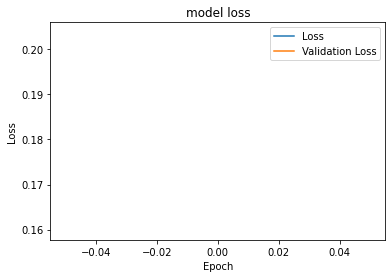

<Figure size 432x288 with 0 Axes>

In [70]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

###  第六题：利用训练好得到的模型(model_final)对图片进行预测(预测该图片中是否包含飞机) 

```
# keras 训练 与 测试
from keras.preprocessing import image
import numpy as np
from keras.models import load_model

img_path = "data2/train/dogs/3046.jpg"
img = image.load_img(img_path, target_size=(113, 113))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
model = load_model('model_weight.h5') 
preds = model.predict(x)
print(preds)
```

im size:  (224, 224, 3)
img size:  (1, 224, 224, 3)


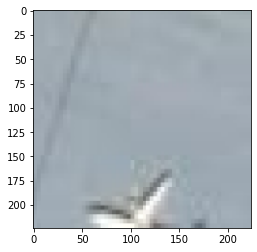

In [79]:
im = X_test[2]
print('im shape: ', im.shape)
plt.imshow(im)
img = np.expand_dims(im, axis=0) # 在0位置添加图片
print('img shape: ', img.shape)

not plane


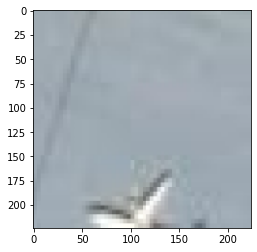

In [76]:
im = X_test[2]
plt.imshow(im)
img = np.expand_dims(im, axis=0) # 在0位置添加图片
########  第六题：利用训练好得到的模型(model_final)对图片进行预测(预测该图片中是否包含飞机)  ########
# 请在此行填写答案：
out = model_final.predict(img)
if out[0][0] > out[0][1]:
    print("plane")
else:
    print("not plane")